In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from utils.TestRunner import *

In [4]:
def replaceColumns(df, columnMapping):
    def replaceColumnSuffix(col):
        for suffix in columnMapping:
            if col.endswith("_" + suffix):
                return suffix + col.replace("_" + suffix, "")
        return col

    df.columns = [replaceColumnSuffix(c) for c in df.columns]

def exportAnalysedData(df, name):
    df = df.fillna(0)
    df.to_csv(f"{dataAnalysisRoot}/AnalysedData/{name}.csv", header=True, sep=",", index=False)

# Horizontal Ground & Air Accelerations

In [5]:
airTests = TestResults.load('HorizontalAirAccelerationTests')
airTests.addAccelerations()
airTests.filterTime(-1, 100)
groundTests = TestResults.load('HorizontalGroundAccelerationTests')
groundTests.addAccelerations()
groundTests.filterTime(-1, 100)

groundTests.filter(lambda d: d[~d['ScenarioName'].str.contains('Crouch')], reset_time_steps=False)

joined = airTests.Data.set_index(['ScenarioName', 'TimeStep']).join(groundTests.Data.set_index(['ScenarioName', 'TimeStep']), lsuffix='_Air', rsuffix='_Ground').reset_index()

replaceColumns(joined, ['Air', 'Ground'])

In [6]:
joined

,ScenarioName,TimeStep,AirActions,AirPositionX,AirPositionY,AirVelocityX,AirVelocityY,AirOnGround,AirOnWall,AirCanJump,AirJumping,AirLookingUp,AirCrouchingDown,AirLeftColliding,AirRightColliding,AirHeadColliding,AirFeetColliding,AirAccelerationX,AirAccelerationY,GroundActions,GroundPositionX,GroundPositionY,GroundVelocityX,GroundVelocityY,GroundOnGround,GroundOnWall,GroundCanJump,GroundJumping,GroundLookingUp,GroundCrouchingDown,GroundLeftColliding,GroundRightColliding,GroundHeadColliding,GroundFeetColliding,GroundAccelerationX,GroundAccelerationY
0,Idle -> Walk,0,[Jump],0.00000,0.00000,0.00000,1.63964,False,False,False,False,False,False,False,False,False,False,NaN,NaN,[],0.00000,0,0.00,0,True,False,True,False,False,False,False,False,False,True,NaN,NaN
1,Idle -> Walk,1,"[Jump, Right]",0.00000,0.01386,0.00000,0.83149,False,False,False,False,False,False,False,False,False,False,0.00000,-0.80815,[Right],0.00000,0,0.00,0,True,False,True,False,False,False,False,False,False,True,0.00,0.0
2,Idle -> Walk,2,"[Jump, Right]",0.00598,0.01416,0.35894,0.01785,False,False,False,False,False,False,False,False,False,False,0.35894,-0.81363,[Right],0.00800,0,0.48,0,True,False,True,False,False,False,False,False,False,True,0.48,0.0
3,Idle -> Walk,3,"[Jump, Right]",0.01800,0.00061,0.72119,-0.81278,False,False,False,False,False,False,False,False,False,False,0.36225,-0.83064,[Right],0.02400,0,0.96,0,True,False,True,False,False,False,False,False,False,True,0.48,0.0
4,Idle -> Walk,4,"[Jump, Right]",0.03615,-0.02722,1.08869,-1.66983,False,False,False,False,False,False,False,False,False,False,0.36750,-0.85705,[Right],0.04800,0,1.44,0,True,False,True,False,False,False,False,False,False,True,0.48,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Sprint -> Idle,20,[Jump],2.74710,-2.72859,8.00122,-18.11740,False,False,False,False,False,False,False,False,False,False,0.00000,-1.08000,[],0.48833,0,0.00,0,True,False,True,False,False,False,False,False,False,True,0.00,0.0
146,Sprint -> Idle,21,[Jump],2.88045,-3.04855,8.00122,-19.19740,False,False,False,False,False,False,False,False,False,False,0.00000,-1.08000,[],0.48833,0,0.00,0,True,False,True,False,False,False,False,False,False,True,0.00,0.0
147,Sprint -> Idle,22,[Jump],3.01380,-3.38188,8.00122,-20.00000,False,False,False,False,False,False,False,False,False,False,0.00000,-0.80260,[],0.48833,0,0.00,0,True,False,True,False,False,False,False,False,False,True,0.00,0.0
148,Sprint -> Idle,23,[Jump],3.14716,-3.71521,8.00122,-20.00000,False,False,False,False,False,False,False,False,False,False,0.00000,0.00000,[],0.48833,0,0.00,0,True,False,True,False,False,False,False,False,False,True,0.00,0.0


0      NaN
1     0.00
2     0.48
3     0.48
4     0.48
5     0.48
6     0.48
7     0.48
8     0.48
9     0.48
10    0.48
11    0.48
12    0.48
13    0.48
14    0.48
15    0.48
16    0.48
17    0.48
18    0.32
19    0.00
20    0.00
21    0.00
22    0.00
23    0.00
24    0.00
Name: GroundAccelerationX, dtype: float64


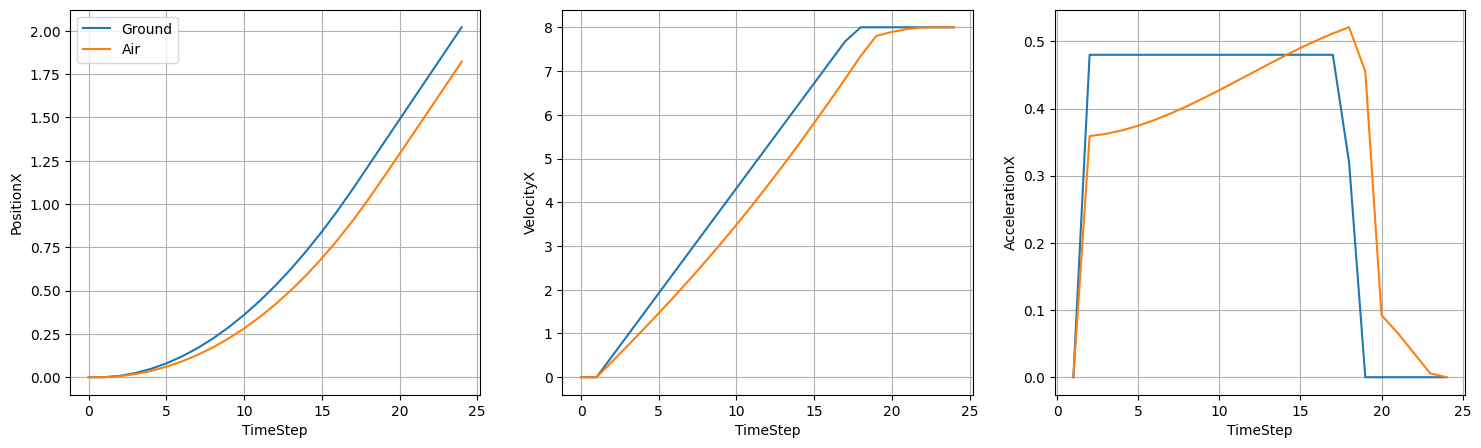

In [9]:
data = TestResults("Idle -> Walk", joined[joined['ScenarioName'] == 'Idle -> Walk'])
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])


print(data.Data['GroundAccelerationX'])

axis = data.preparePlots(3)
data.comparePlot(axis[0], ['GroundPositionX', 'AirPositionX'], y_label='PositionX', labels=['Ground', 'Air'], showLegend=True)
data.comparePlot(axis[1], ['GroundVelocityX', 'AirVelocityX'], y_label='VelocityX', labels=['Ground', 'Air'], showLegend=False)
data.comparePlot(axis[2], ['GroundAccelerationX', 'AirAccelerationX'], y_label='AccelerationX', labels=['Ground', 'Air'], showLegend=False)

plt.savefig(f'{dataAnalysisRoot}/TestResultPlots/Ground_Air.Idle_Walk.png', dpi=300, bbox_inches='tight')
exportAnalysedData(data.Data, 'Ground_Air.Idle_Walk')

25      NaN
26    0.000
27    0.768
28    0.768
29    0.768
30    0.768
31    0.768
32    0.768
33    0.768
34    0.768
35    0.768
36    0.768
37    0.768
38    0.768
39    0.768
40    0.768
41    0.768
42    0.768
43    0.512
44    0.000
45    0.000
46    0.000
47    0.000
48    0.000
49    0.000
Name: GroundAccelerationX, dtype: float64


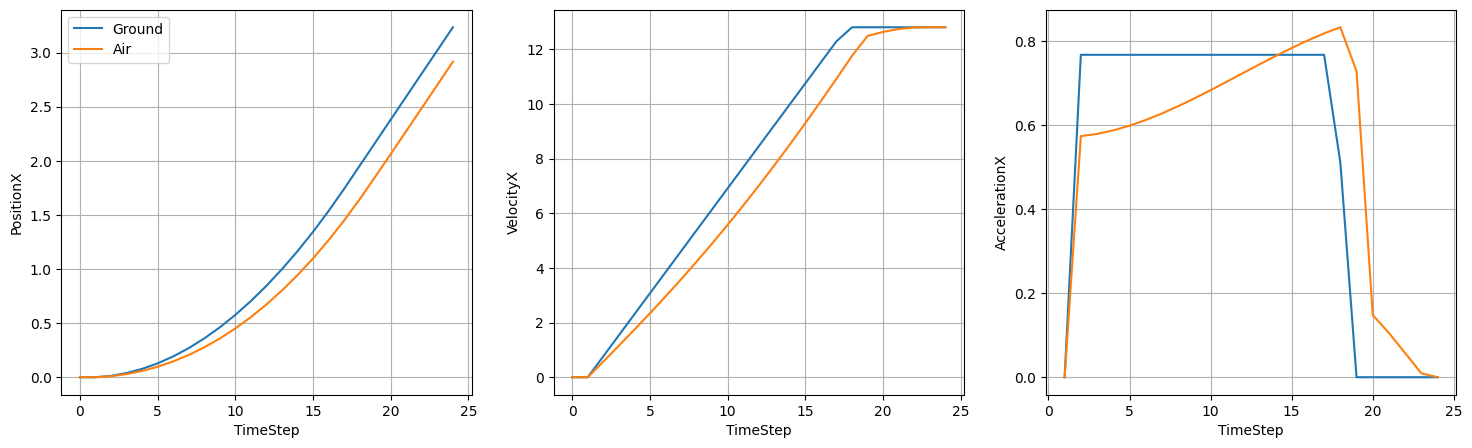

In [8]:
data = TestResults("Idle -> Sprint", joined[joined['ScenarioName'] == 'Idle -> Sprint'])
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

# print(data.Data['GroundAccelerationX'])

axis = data.preparePlots(3)
data.comparePlot(axis[0], ['GroundPositionX', 'AirPositionX'], y_label='PositionX', labels=['Ground', 'Air'], showLegend=True)
data.comparePlot(axis[1], ['GroundVelocityX', 'AirVelocityX'], y_label='VelocityX', labels=['Ground', 'Air'], showLegend=False)
data.comparePlot(axis[2], ['GroundAccelerationX', 'AirAccelerationX'], y_label='AccelerationX', labels=['Ground', 'Air'], showLegend=False)

plt.savefig(f'{dataAnalysisRoot}/TestResultPlots/Ground_Air.Idle_Sprint.png', dpi=300, bbox_inches='tight')
exportAnalysedData(data.Data, 'Ground_Air.Idle_Sprint')

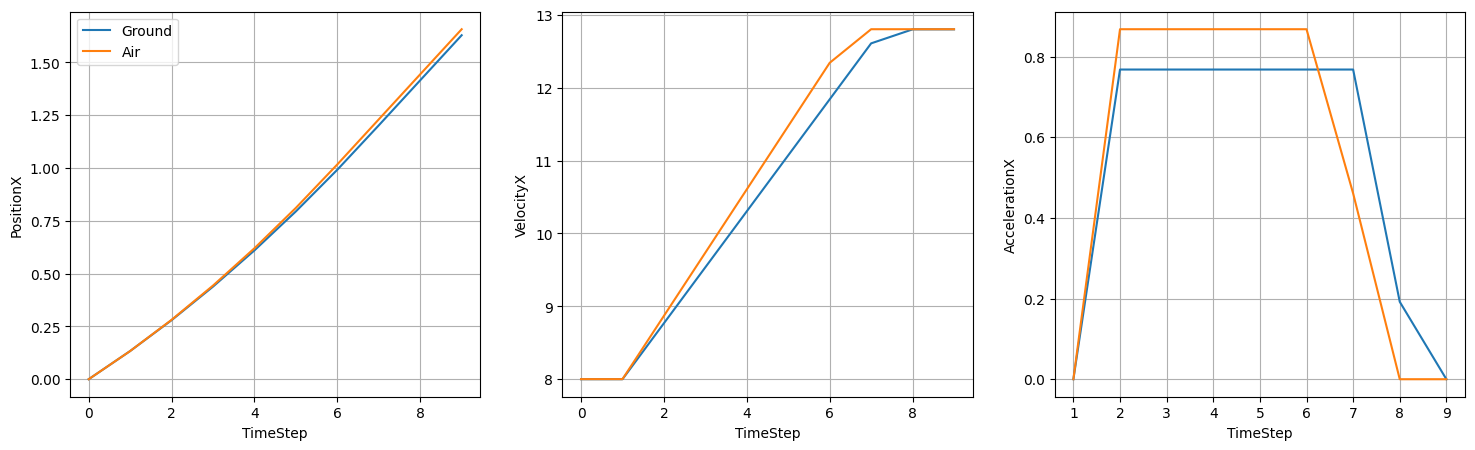

In [7]:
data = joined[joined['ScenarioName'] == 'Walk -> Sprint']
data = data[data.TimeStep < 10]
data = TestResults("Walk -> Sprint", data)

data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(3)
data.comparePlot(axis[0], ['GroundPositionX', 'AirPositionX'], y_label='PositionX', labels=['Ground', 'Air'], showLegend=True)
data.comparePlot(axis[1], ['GroundVelocityX', 'AirVelocityX'], y_label='VelocityX', labels=['Ground', 'Air'], showLegend=False)
data.comparePlot(axis[2], ['GroundAccelerationX', 'AirAccelerationX'], y_label='AccelerationX', labels=['Ground', 'Air'], showLegend=False)

plt.savefig(f'{dataAnalysisRoot}/TestResultPlots/Ground_Air.Walk_Sprint.png', dpi=300, bbox_inches='tight')
exportAnalysedData(data.Data, 'Ground_Air.Walk_Sprint')

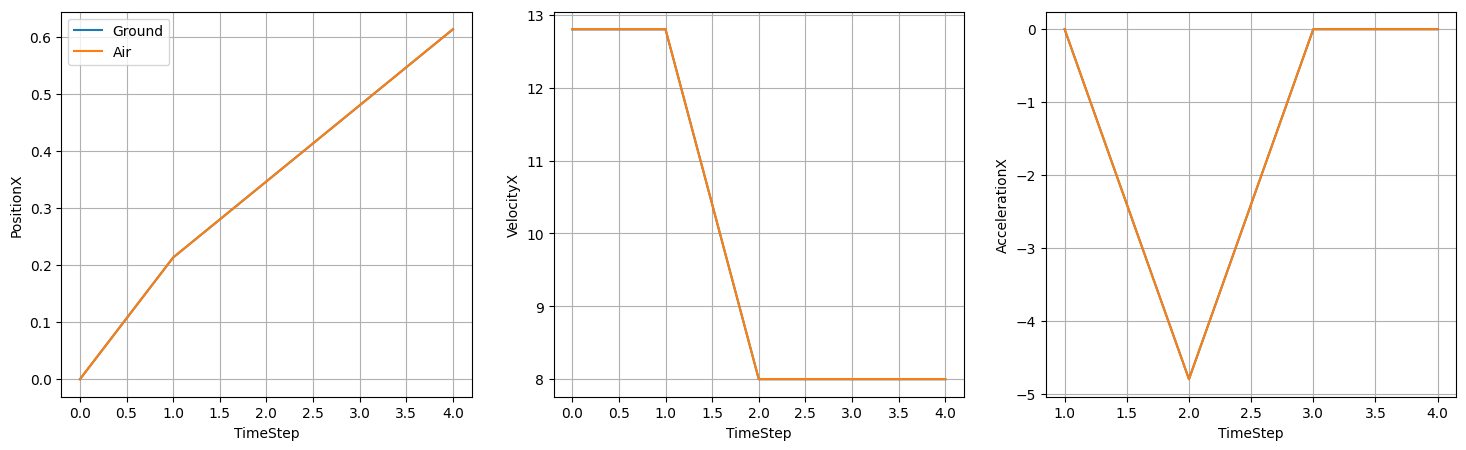

In [8]:
data = joined[joined['ScenarioName'] == 'Sprint -> Walk']
data = data[data.TimeStep < 5]
data = TestResults("Sprint -> Walk", data)
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(3)
data.comparePlot(axis[0], ['GroundPositionX', 'AirPositionX'], y_label='PositionX', labels=['Ground', 'Air'], showLegend=True)
data.comparePlot(axis[1], ['GroundVelocityX', 'AirVelocityX'], y_label='VelocityX', labels=['Ground', 'Air'], showLegend=False)
data.comparePlot(axis[2], ['GroundAccelerationX', 'AirAccelerationX'], y_label='AccelerationX', labels=['Ground', 'Air'], showLegend=False)

plt.savefig(f'{dataAnalysisRoot}/TestResultPlots/Ground_Air.Sprint_Walk.png', dpi=300, bbox_inches='tight')
exportAnalysedData(data.Data, 'Ground_Air.Sprint_Walk')

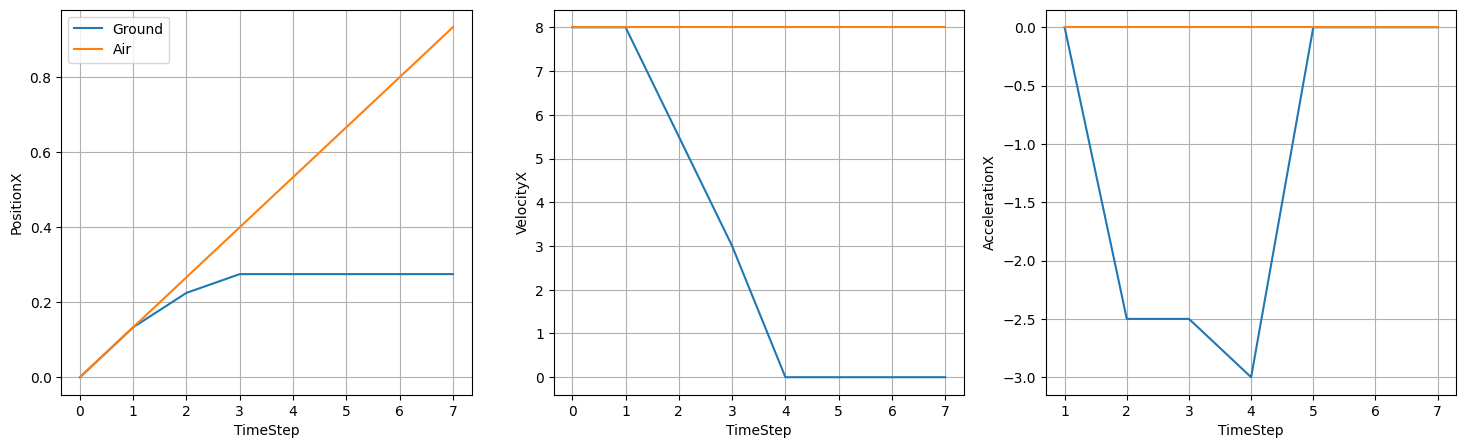

In [9]:
data = joined[joined['ScenarioName'] == 'Walk -> Idle']
data = data[data.TimeStep < 8]
data = TestResults("Walk -> Idle", data)
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(3)
data.comparePlot(axis[0], ['GroundPositionX', 'AirPositionX'], y_label='PositionX', labels=['Ground', 'Air'], showLegend=True)
data.comparePlot(axis[1], ['GroundVelocityX', 'AirVelocityX'], y_label='VelocityX', labels=['Ground', 'Air'], showLegend=False)
data.comparePlot(axis[2], ['GroundAccelerationX', 'AirAccelerationX'], y_label='AccelerationX', labels=['Ground', 'Air'], showLegend=False)

plt.savefig(f'{dataAnalysisRoot}/TestResultPlots/Ground_Air.Walk_Idle.png', dpi=300, bbox_inches='tight')
exportAnalysedData(data.Data, 'Ground_Air.Walk_Idle')

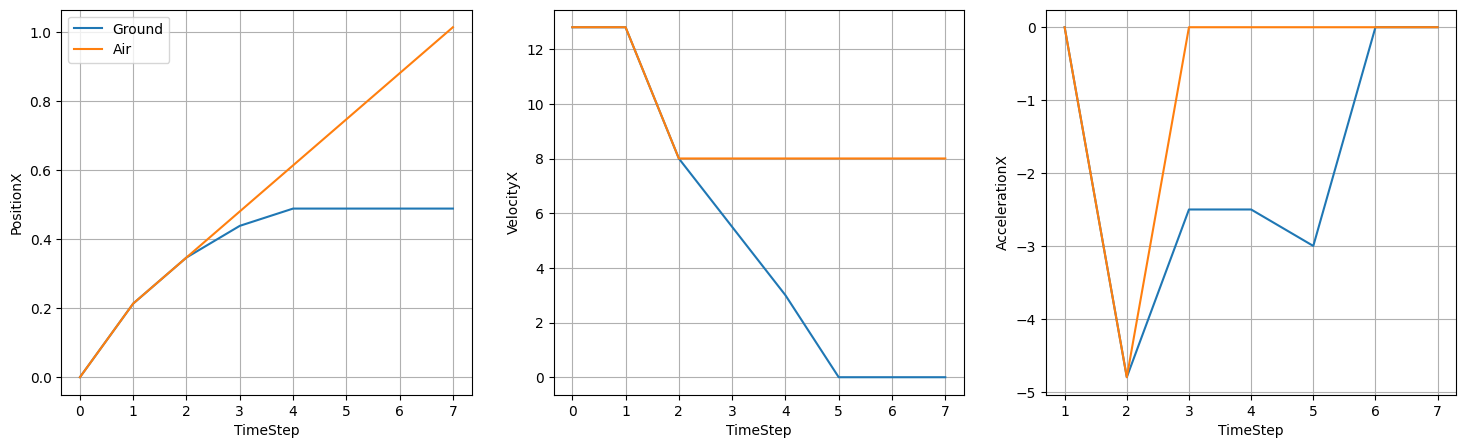

In [10]:
data = joined[joined['ScenarioName'] == 'Sprint -> Idle']
data = data[data.TimeStep < 8]
data = TestResults("Sprint -> Idle", data)
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(3)
data.comparePlot(axis[0], ['GroundPositionX', 'AirPositionX'], y_label='PositionX', labels=['Ground', 'Air'], showLegend=True)
data.comparePlot(axis[1], ['GroundVelocityX', 'AirVelocityX'], y_label='VelocityX', labels=['Ground', 'Air'], showLegend=False)
data.comparePlot(axis[2], ['GroundAccelerationX', 'AirAccelerationX'], y_label='AccelerationX', labels=['Ground', 'Air'], showLegend=False)

plt.savefig(f'{dataAnalysisRoot}/TestResultPlots/Ground_Air.Sprint_Idle.png', dpi=300, bbox_inches='tight')
exportAnalysedData(data.Data, 'Ground_Air.Sprint_Idle')

# Horizontal Ground & Air Turnaround Accelerations

In [11]:
airTests = TestResults.load('HorizontalAirTurnaroundTests')
airTests.addAccelerations()
groundTests = TestResults.load('HorizontalGroundTurnaroundTests')
groundTests.addAccelerations()

joined = airTests.Data.set_index(['ScenarioName', 'TimeStep']).join(groundTests.Data.set_index(['ScenarioName', 'TimeStep']), lsuffix='_Air', rsuffix='_Ground').reset_index()

replaceColumns(joined, ['Air', 'Ground'])
airTests.getTestCases()

['Right -> Left',
 'Right -> Left,Sprint',
 'Right,Sprint -> Left',
 'Right,Sprint -> Left,Sprint',
 'Right,Sprint -> Left -> Left,Sprint']

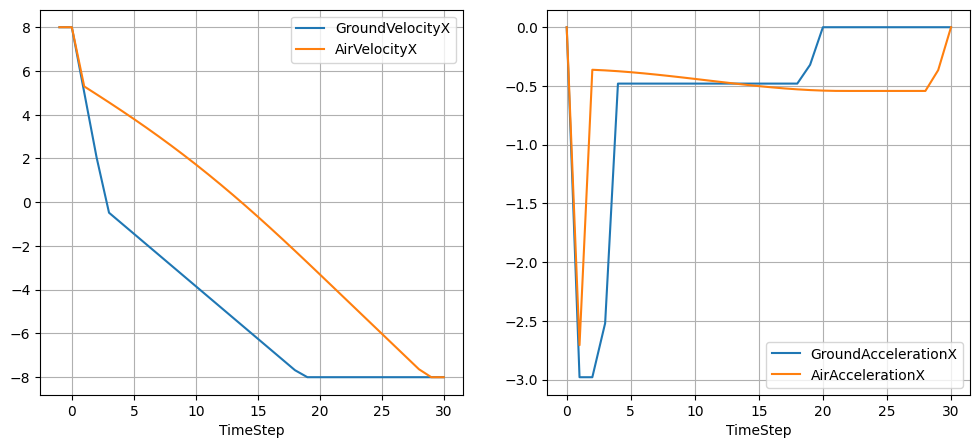

In [12]:
data = TestResults("Right -> Left", joined[joined['ScenarioName'] == 'Right -> Left'])
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(2)
data.comparePlot(axis[0], ['GroundVelocityX', 'AirVelocityX'])
data.comparePlot(axis[1], ['GroundAccelerationX', 'AirAccelerationX'])

exportAnalysedData(data.Data, 'Ground_Air.Turn.Walk_Walk')

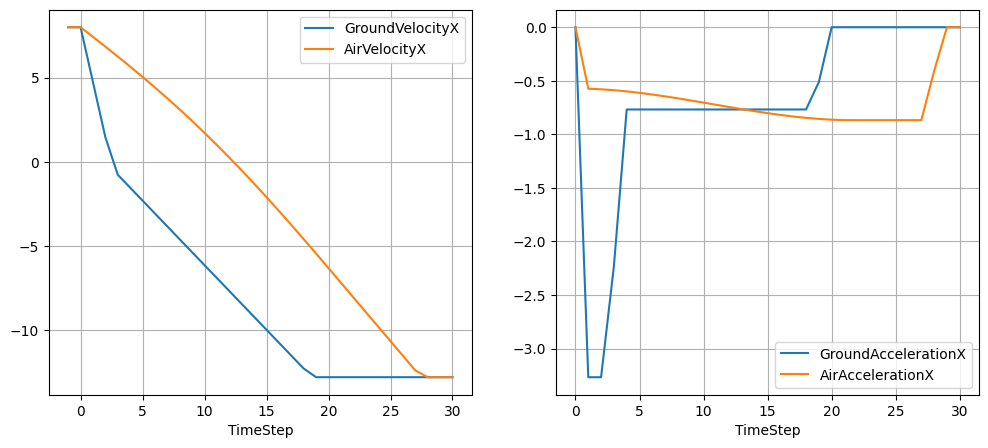

In [13]:
data = TestResults("Right -> Left,Sprint", joined[joined['ScenarioName'] == 'Right -> Left,Sprint'])
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(2)
data.comparePlot(axis[0], ['GroundVelocityX', 'AirVelocityX'])
data.comparePlot(axis[1], ['GroundAccelerationX', 'AirAccelerationX'])

exportAnalysedData(data.Data, 'Ground_Air.Turn.Walk_Sprint')

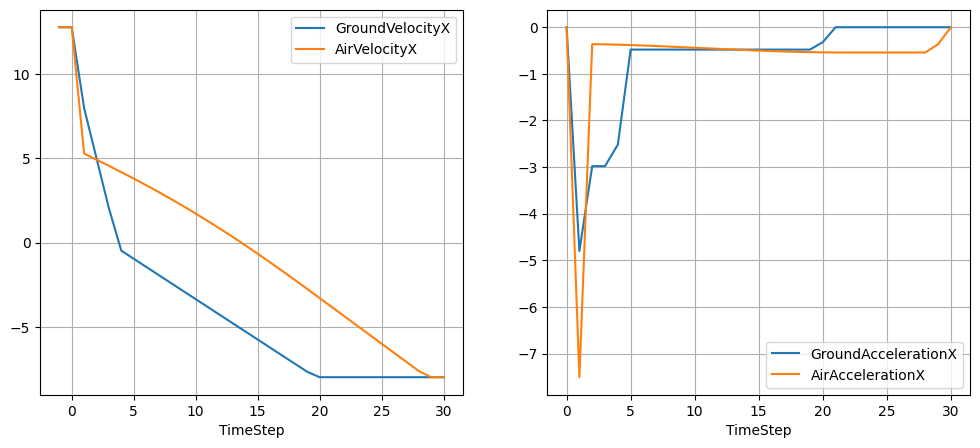

In [14]:
data = TestResults("Right,Sprint -> Left", joined[joined['ScenarioName'] == 'Right,Sprint -> Left'])
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(2)
data.comparePlot(axis[0], ['GroundVelocityX', 'AirVelocityX'])
data.comparePlot(axis[1], ['GroundAccelerationX', 'AirAccelerationX'])

exportAnalysedData(data.Data, 'Ground_Air.Turn.Sprint_Walk')

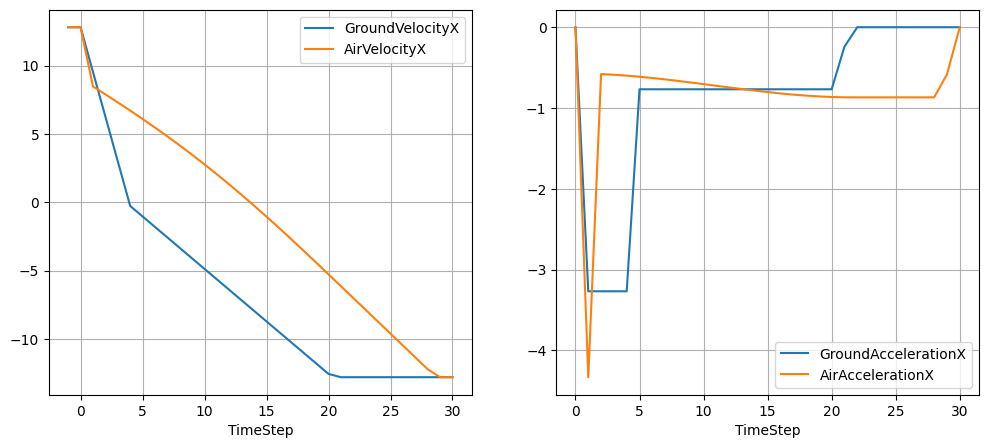

In [15]:
data = TestResults("Right,Sprint -> Left,Sprint", joined[joined['ScenarioName'] == 'Right,Sprint -> Left,Sprint'])
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(2)
data.comparePlot(axis[0], ['GroundVelocityX', 'AirVelocityX'])
data.comparePlot(axis[1], ['GroundAccelerationX', 'AirAccelerationX'])

exportAnalysedData(data.Data, 'Ground_Air.Turn.Sprint_Sprint')

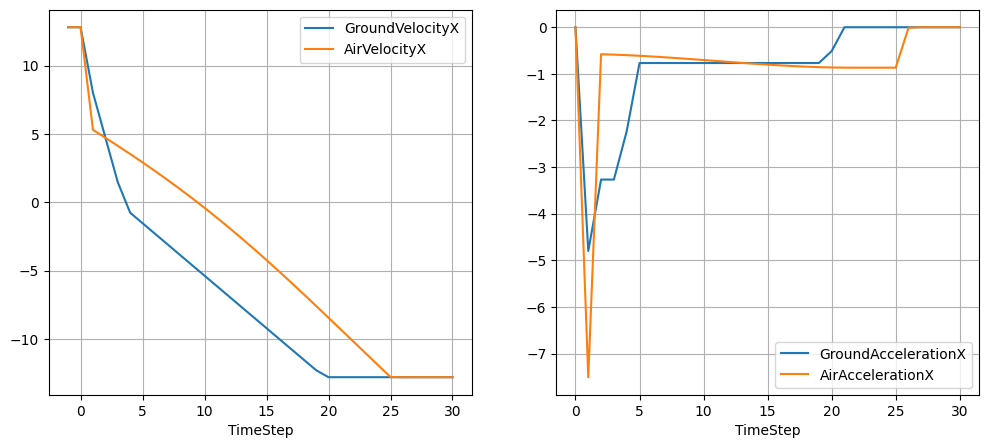

In [16]:
data = TestResults("Right,Sprint -> Left -> Left,Sprint", joined[joined['ScenarioName'] == 'Right,Sprint -> Left -> Left,Sprint'])
data.selectColumns(['TimeStep', 'GroundPositionX', 'GroundVelocityX', 'GroundAccelerationX', 'AirPositionX', 'AirVelocityX', 'AirAccelerationX'])

axis = data.preparePlots(2)
data.comparePlot(axis[0], ['GroundVelocityX', 'AirVelocityX'])
data.comparePlot(axis[1], ['GroundAccelerationX', 'AirAccelerationX'])

exportAnalysedData(data.Data, 'Ground_Air.Turn.Sprint_Walk_Sprint')

# Horizontal Air Stop Accelerations

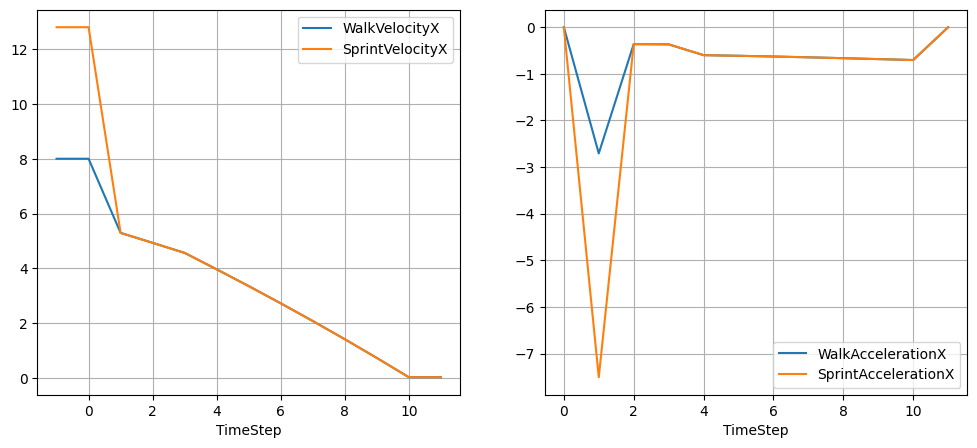

In [17]:
wallJumpData = TestResults.load('HorizontalAirStopTests')
wallJumpData.addAccelerations()

walkWalkStop = TestResults('Walk -> Idle', wallJumpData.Data[wallJumpData.Data['ScenarioName'] == 'Walk -> Idle'])
sprintStop = TestResults('Sprint -> Idle', wallJumpData.Data[wallJumpData.Data['ScenarioName'] == 'Sprint -> Idle'])


joined = walkWalkStop.Data.set_index('TimeStep').join(sprintStop.Data.set_index('TimeStep'), lsuffix='_Walk', rsuffix='_Sprint').reset_index()

replaceColumns(joined, ['Walk', 'Sprint'])

merged = TestResults('Walk,Sprint -> Idle', joined)
merged.selectColumns(['TimeStep', 'WalkPositionX', 'WalkVelocityX', 'WalkAccelerationX', 'SprintPositionX', 'SprintVelocityX', 'SprintAccelerationX'])


axis = merged.preparePlots(2)
merged.comparePlot(axis[0], ['WalkVelocityX', 'SprintVelocityX'])
merged.comparePlot(axis[1], ['WalkAccelerationX', 'SprintAccelerationX'])

exportAnalysedData(merged.Data, 'Air.Walk_Sprint.Idle')

# Horizontal WallJump Accelerations

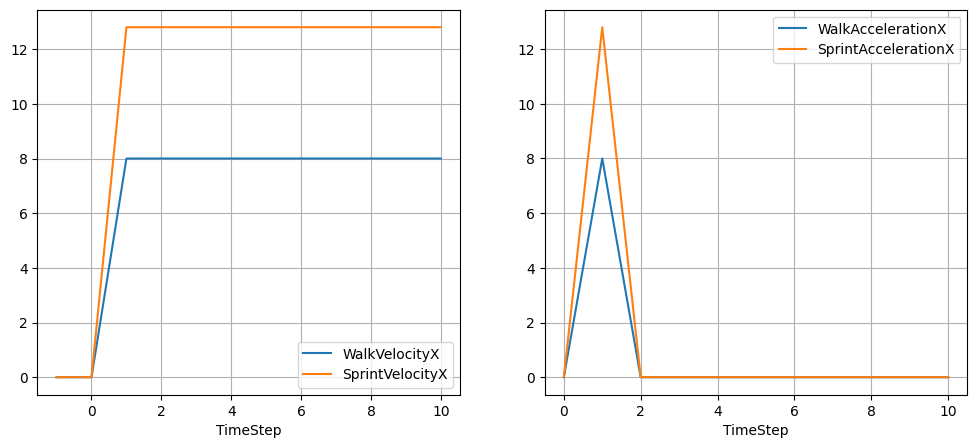

In [18]:
wallJumpData = TestResults.load('HorizontalWallJumpTests')
wallJumpData.Data['VelocityX'] = wallJumpData.Data['VelocityX'].round(3)
wallJumpData.addAccelerations()

walkWallJump = TestResults('Wall -> Walk', wallJumpData.Data[wallJumpData.Data['ScenarioName'] == 'Wall -> Walk'])
sprintWallJump = TestResults('Wall -> Sprint', wallJumpData.Data[wallJumpData.Data['ScenarioName'] == 'Wall -> Sprint'])


joined = walkWallJump.Data.set_index('TimeStep').join(sprintWallJump.Data.set_index('TimeStep'), lsuffix='_Walk', rsuffix='_Sprint').reset_index()

replaceColumns(joined, ['Walk', 'Sprint'])

merged = TestResults('Wall -> Walk,Sprint', joined)
merged.selectColumns(['TimeStep', 'WalkPositionX', 'WalkVelocityX', 'WalkAccelerationX', 'SprintPositionX', 'SprintVelocityX', 'SprintAccelerationX'])


axis = merged.preparePlots(2)
merged.comparePlot(axis[0], ['WalkVelocityX', 'SprintVelocityX'])
merged.comparePlot(axis[1], ['WalkAccelerationX', 'SprintAccelerationX'])

exportAnalysedData(merged.Data, 'WallJump.XAcceleration')

# Vertical Ground & Wall Accelerations

In [18]:
def exportVerticalJumpCurves(testName, outputName):
    results = TestResults.load(testName)
    results.addAccelerations()


    results.plotTests([ 
        ('PositionX', 'PositionY'),
        ('TimeStep', 'VelocityY'),
        ('TimeStep', 'VelocityX'),
    ])


    def join_nested_columns(columns):
        columns = [c for c in list(columns) if len(c) > 0]

        if len(columns) == 2:
            return f'{columns[0]}_{columns[1].split("_")[1]}'
        return columns[0]

    pivotTable = results.Data.pivot_table(index=['TimeStep'], columns=['ScenarioName'], values=['PositionY', 'VelocityY', 'AccelerationY']).reset_index()

    pivotTable.columns = [join_nested_columns(col) for col in pivotTable.columns.values]
    exportAnalysedData(pivotTable, outputName)

def exportMaxJumpData(testName, outputName):
    results = TestResults.load(testName)
    data = results.Data[['ScenarioName', 'TimeStep', 'PositionY']]
    data['Jump'] = data['ScenarioName'].str.split('_').str[1].astype(int)

    data.drop(columns=['ScenarioName'], inplace=True)

    grouped = data.groupby(['Jump']).max()
    grouped.rename(columns={'PositionY': 'MaxHeight'}, inplace=True)
    grouped['AtFrame'] = data.groupby(['Jump']).apply(lambda x: x[x['PositionY'] == x['PositionY'].max()]['TimeStep'].values[0])
    grouped.drop(columns=['TimeStep'], inplace=True)

    def getMaxJumpData(minJump, maxJump):
        return grouped[(grouped.index >= minJump) & (grouped.index <= maxJump)]

    grouped = pd.concat([
        getMaxJumpData(1, 6).reset_index(),
        getMaxJumpData(7, 12).reset_index(),
        getMaxJumpData(13, 18).reset_index(),
        getMaxJumpData(19, 23).reset_index()
    ], axis=1)
    grouped.fillna(0, inplace=True)
    grouped['Jump'] = grouped['Jump'].astype(int)
    grouped['AtFrame'] = grouped['AtFrame'].astype(int)

    exportAnalysedData(grouped, outputName)

    return grouped

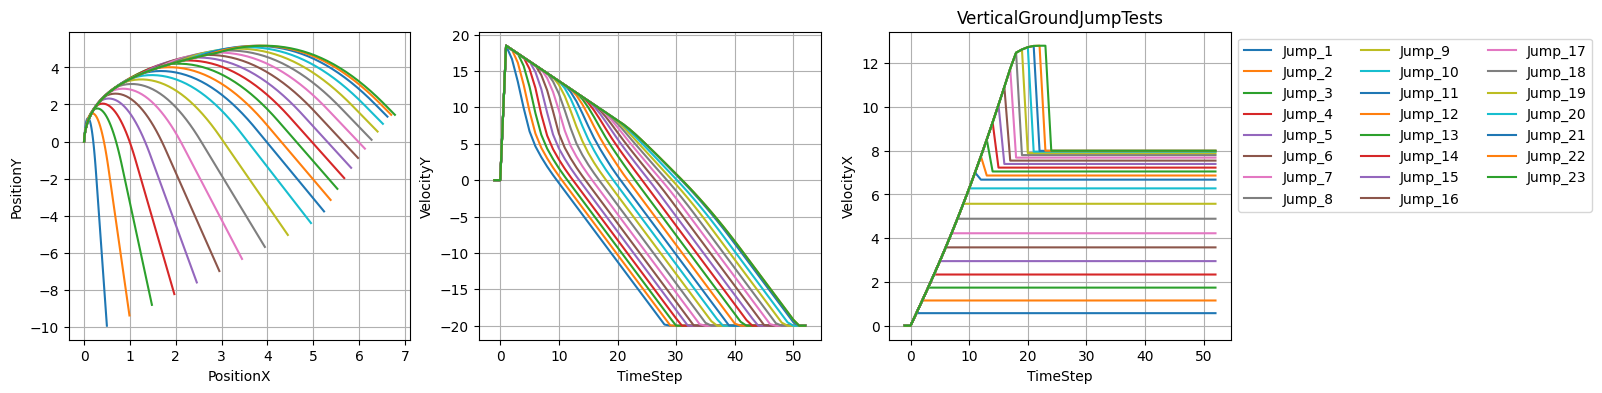

In [19]:
exportVerticalJumpCurves('VerticalGroundJumpTests', 'Ground.JumpData')

In [20]:
exportMaxJumpData('VerticalGroundJumpTests', 'Ground.JumpData2')

,Jump,MaxHeight,AtFrame,Jump,MaxHeight,AtFrame,Jump,MaxHeight,AtFrame,Jump,MaxHeight,AtFrame
0,1,1.25955,9,7,2.85019,15,13,4.19923,22,19,5.01114,29
1,2,1.51987,10,8,3.10476,16,14,4.37503,24,20,5.09315,30
2,3,1.78414,11,9,3.34960,18,15,4.53412,25,21,5.16264,30
3,4,2.04638,12,10,3.58475,19,16,4.67672,26,22,5.17064,31
4,5,2.32103,13,11,3.80524,20,17,4.80342,27,23,5.17064,31
5,6,2.58429,14,12,4.01036,21,18,4.91474,28,0,0.00000,0


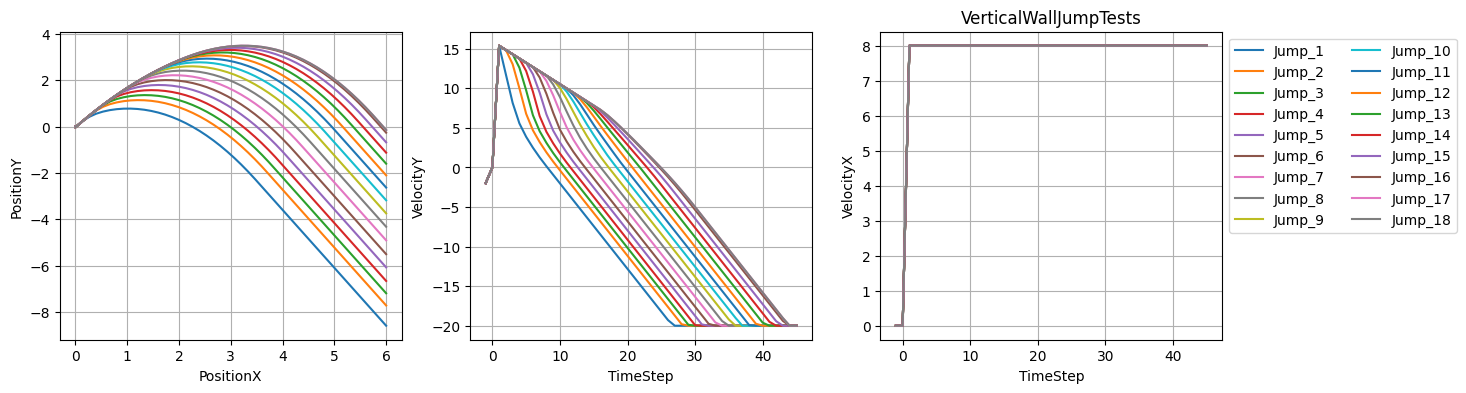

In [21]:
exportVerticalJumpCurves('VerticalWallJumpTests', 'Wall.JumpData')

In [22]:
exportMaxJumpData('VerticalWallJumpTests', 'Wall.JumpData2')

,Jump,MaxHeight,AtFrame,Jump,MaxHeight,AtFrame,Jump,MaxHeight,AtFrame,Jump,MaxHeight,AtFrame
0,1,0.77660,8,7,2.21617,14,13,3.19937,21,0,0.0,0
1,2,1.14235,9,8,2.41337,16,14,3.30786,22,0,0.0,0
2,3,1.35940,10,9,2.60093,17,15,3.40090,23,0,0.0,0
3,4,1.57294,11,10,2.77462,18,16,3.47914,24,0,0.0,0
4,5,1.79583,12,11,2.93291,19,17,3.49022,24,0,0.0,0
5,6,2.00749,13,12,3.07465,20,18,3.49022,24,0,0.0,0
